In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
result = response.json()

In [6]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [7]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [8]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


### Question 1: Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [19]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [20]:
args = '?year=2016&query_text=fire&$limit=50000'

In [21]:
fire = endpoint + args

In [22]:
response = requests.get(fire)

In [23]:
response

<Response [200]>

In [24]:
fire_df = pd.read_json(fire)

In [25]:
fire_df = fire_df.reset_index(drop= True)

In [26]:
fire_df = fire_df.sort_values('query_count',ascending = False)

In [27]:
fire_df

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire
2,March,2016,32,fire
10,November,2016,32,fire
5,June,2016,31,fire
3,April,2016,26,fire
4,May,2016,24,fire


#### Fire was searched the most in August

### Question 2: Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [36]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [37]:
args = '?$where=query_count>100&$limit=10000'

In [38]:
query_large = endpoint + args

In [39]:
response = requests.get(query_large)

In [40]:
result = response.json()
len(result)

1262

In [41]:
query_large_df = pd.read_json(query_large)

In [42]:
query_large_df

,month_name,year,query_count,query_text,month
0,March,2014,101,permits,NaN
1,January,2015,101,criminal court clerk,NaN
2,September,2015,101,codes,NaN
3,March,2016,101,police,NaN
4,March,2016,101,civil service,NaN
...,...,...,...,...,...
1257,September,2018,750,annual enrollment,NaN
1258,October,2018,816,annual enrollment,NaN
1259,January,2019,2646,Nashville,1.0
1260,September,2019,5327,directory,9.0


####  A query was run more than 100 times in a month 1,262 times

### Question 3: Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [43]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [44]:
args = '?$where=query_count>100&query_text=codes&$limit=10000'

In [45]:
big_codes = endpoint + args

In [46]:
response = requests.get(big_codes)

In [47]:
result = response.json()
len(result)

56

In [48]:
big_codes_df = pd.read_json(big_codes)

In [49]:
big_codes_df

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4.0
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11.0
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7.0
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5.0


#### The term "codes" was searched more than 100 times in a month 56 times

### Question 4: Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [50]:
endpoint ='https://data.nashville.gov/resource/fuaa-r5cm.json'

In [51]:
args = '?query_text=maps&$limit=50000&$where=query_count>0'

In [52]:
maps = endpoint + args

In [53]:
response = requests.get(maps)

In [54]:
map_result = response.json()
len(map_result)

82

In [55]:
search_dict = {}
for line in map_result:
    count = int(line.get('query_count'))
    text = line.get('month_name')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [56]:
map_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
map_df = map_df.reset_index()
map_df.columns = ['month', 'map_count']
map_df = map_df.sort_values('map_count',ascending=False)
map_df

,month,map_count
3,April,1309
5,June,1216
2,March,1090
6,July,1062
4,May,1019
7,August,991
9,October,981
8,September,951
0,January,924
1,February,832


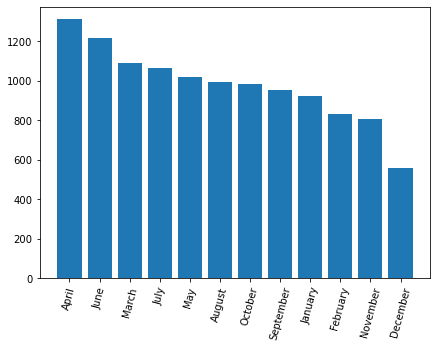

In [59]:
plt.figure(figsize=(7,5))
plt.bar('month', 'map_count', data = map_df)
plt.xticks(rotation = 75);

### Question 5: Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)